   # Answer Number (1):

In [1]:
import numpy as np

# Obtaining  the rawdata of starfish csv file from astro github site
rawdata = np.genfromtxt("https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Week-1/Assignment/Starfish_Data.csv", delimiter = ',', dtype='float64')

# In the raw data array,  1st column represents Apparent Visual Magnitude,as seen from earth (m)
# 2nd column represents log(L / L_0)
# 3rd column represents probability of the star belonging to the Cluster


#The stars of the different clusters are divided into
#four groups based on the proper-motion cluster membership probabilities, (1) proper-motion members with very high cluster
#membership probability, i.e. ≥ 80 per cent, (2) proper-motion members with a cluster membership probability between 50 and 80 percent, 
#(3) proper-motion non-members with a cluster membership probability <50 per cent and 
#(4) proper-motion non-members with very low cluster membership probability, i.e. <20 per cent (Berger1982; Baumgardt et al. 2000).


## Removing rows which have probability of presence in the cluster <20 per cent
newdata = rawdata.copy()
newdata = newdata[np.logical_not(newdata[:,2] < 20)]
                                # The truncated array is a 96*3 matrix. Verified by newdata.shape command

    
# As the data is 96*3 matrix. So we will get 96 values of logarithm of distances

distance_log = np.zeros(96, dtype = "float64").reshape(96,1)
i = 0
while i < 96:
    distance_log[i,0] = (newdata[i, 0]/5) + (newdata[i, 1]/2) + (0.17/5)
    i += 1


distance = 10**(distance_log) 

#Mean calculation

mean = distance.mean()

print("The distance to starfish cluster is:", mean,"parsec")


The distance to starfish cluster is: 1375.211591631958 parsec


# Answer Number (2):

1. The coordinates of Granat 1915+105 in (ra, dec) is ( 288.8208333 , 10.96833333 ).

2. The number of stars in High Mass X-Ray Binaries is 118 .
3. The number of stars in Low Mass X-Ray Binaries is 121 .




Mollweid projection accepts data in the range of:
1. [-𝝿, 𝝿] for x axis, and
2.[-𝝿/2, 𝝿/2] for y axis.


<Figure size 432x288 with 0 Axes>

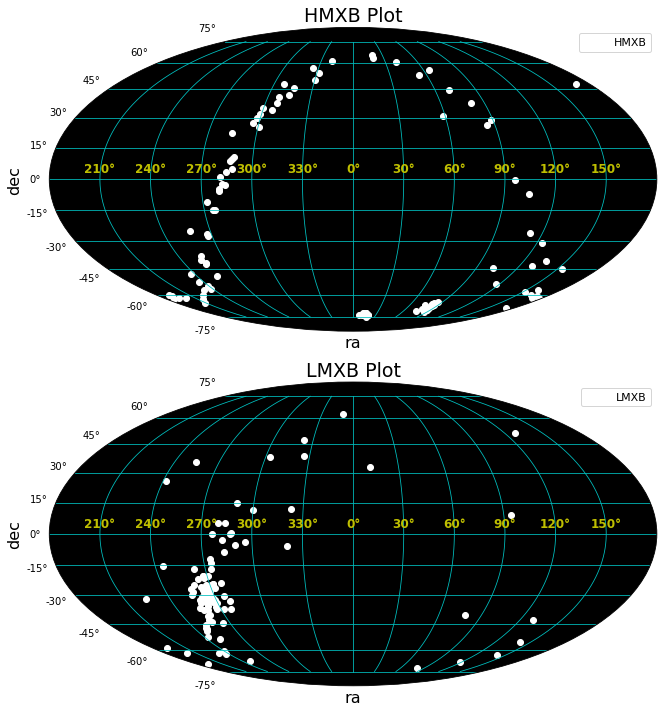

<Figure size 432x288 with 0 Axes>

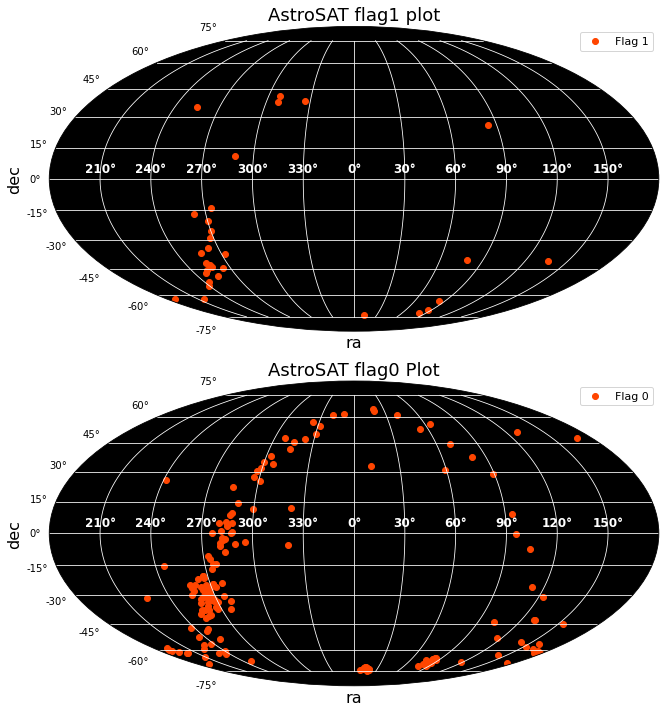

<Figure size 432x288 with 0 Axes>

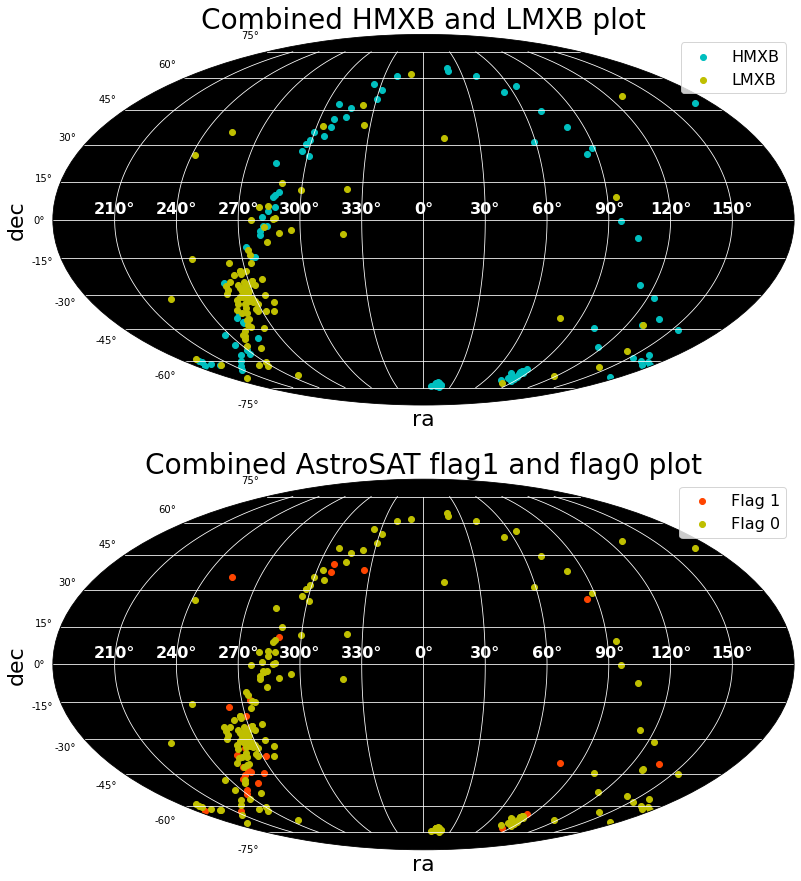

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Week-1/Assignment/Astrosat_Catalog.csv", delimiter = ',')

#Finding Granat 1915+105 in the data
a = df.loc[df["SIMBAD_Name"] == 'Granat 1915+105']
print("1. The coordinates of Granat 1915+105 in (ra, dec) is (", a.iloc[0,0],",", a.iloc[0,1],").\n")

newdata1 = df.loc[df["Final_Type"] == "HMXB"]
newdata2 = df.loc[df["Final_Type"] == "LMXB"]
newdata3 = df.loc[df["Astrosat_Flag"] == 1]
newdata4 = df.loc[df["Astrosat_Flag"] == 0]

## Counting number of HMXB and LMXB
print("2. The number of stars in High Mass X-Ray Binaries is", len(newdata1.index),".")
print("3. The number of stars in Low Mass X-Ray Binaries is", len(newdata2.index),".")

##Taking required columns as 1D array from HMXB from newdata1
i = 0
ra_1 = np.zeros(118)
dec_1 = np.zeros(118)
while i < 118:
    ra_1[i] = newdata1.iloc[i,0]
    dec_1[i] = newdata1.iloc[i,1]
    i+=1

    
##Taking required columns as 1D array from LMXB from newdata2
i = 0
ra_2 = np.zeros(121)
dec_2 = np.zeros(121)
while i < 121:
    ra_2[i] = newdata2.iloc[i,0]
    dec_2[i] = newdata2.iloc[i,1]
    i+=1

##Taking required columns as 1D array from flag1 from newdata3
i = 0
ra_3 = np.zeros(31)
dec_3 = np.zeros(31)
while i < 31:
    ra_3[i] = newdata3.iloc[i,0]
    dec_3[i] = newdata3.iloc[i,1]
    i+=1

    
##Taking required columns as 1D array from flag0 from newdata4
i = 0
ra_4 = np.zeros(208)
dec_4 = np.zeros(208)
while i < 208:
    ra_4[i] = newdata4.iloc[i,0]
    dec_4[i] = newdata4.iloc[i,1]
    i+=1

    
from numpy import pi

#Making values of ra_1 in range of -180 to 180
i = 0
while i < 118:
    if ra_1[i] >=180:
        ra_1[i] -= 360
    i += 1

#Making values of ra_2 in range of -180 to 180
i = 0
while i < 121:
    if ra_2[i] >=180:
        ra_2[i] -= 360
    i += 1
    
#Making values of ra_3 in range of -180 to 180
i = 0
while i < 31:
    if ra_3[i] >= 180:
        ra_3[i] -= 360
    i += 1

#Making values of ra_4 in range of -180 to 180
i = 0
while i < 208:
    if ra_4[i] >= 180:
        ra_4[i] -= 360
    i += 1  


#Converting ra and dec into radians
ra_1 *= (pi/180)        
dec_1 *= (pi/180)               #degree to radian conversion


ra_2 *= (pi/180)                 
dec_2 *= (pi/180)    

ra_3 *= (pi/180)                 
dec_3 *= (pi/180)              

ra_4 *= (pi/180)                 
dec_4 *= (pi/180)         


print("\n\n\n\nMollweid projection accepts data in the range of:")
print("1. [-𝝿, 𝝿] for x axis, and")
print("2.[-𝝿/2, 𝝿/2] for y axis.")
# plotting HMXB and LMXB
plt.figure(1)
plt.figure(figsize=(10, 10))

hmxb = plt.subplot(211, projection = "mollweide", facecolor = 'k')
hmxb.scatter(ra_1, dec_1, c = 'w', label = 'HMXB')
hmxb.legend(loc = "upper right", prop={'size': 11})
hmxb.set(title = "HMXB Plot")
hmxb.title.set_fontsize(19)
hmxb.grid(c = 'c')
hmxb.set_xticklabels(['210°','240°','270°','300°','330°','0°','30°','60°','90°','120°','150°'], c= 'y', fontweight = 'bold', fontsize = 12)
hmxb.set_xlabel('ra')
hmxb.xaxis.label.set_size(16)
hmxb.set_ylabel('dec')
hmxb.yaxis.label.set_size(16)


lmxb = plt.subplot(212, projection = "mollweide", facecolor = 'k')
lmxb.scatter(ra_2, dec_2, c = 'w', label = 'LMXB')
lmxb.legend(loc = "upper right", prop={'size': 11})
lmxb.set(title = "LMXB Plot")
lmxb.title.set_fontsize(19)
lmxb.grid(c = 'c')
lmxb.set_xticklabels(['210°','240°','270°','300°','330°','0°','30°','60°','90°','120°','150°'], c= 'y', fontweight = 'bold', fontsize = 12)
lmxb.set_xlabel('ra')
lmxb.xaxis.label.set_size(16)
lmxb.set_ylabel('dec')
lmxb.yaxis.label.set_size(16)


plt.tight_layout()
plt.show()


# plotting flag1 and flag0
plt.figure(2)
plt.figure(figsize=(10, 10))

f1 = plt.subplot(211, projection = "mollweide", facecolor = 'k')
f1.scatter(ra_3, dec_3, c = '#FF4500', label = "Flag 1")
f1.legend(loc = "upper right", prop={'size': 11})
f1.set(title = "AstroSAT flag1 plot")
f1.title.set_fontsize(18)
f1.grid(c = 'w')
f1.set_xticklabels(['210°','240°','270°','300°','330°','0°','30°','60°','90°','120°','150°'], c= 'w', fontweight = 'bold', fontsize = 12)
f1.set_xlabel('ra')
f1.xaxis.label.set_size(16)
f1.set_ylabel('dec')
f1.yaxis.label.set_size(16)


f0 = plt.subplot(212, projection = "mollweide", facecolor = 'k')
f0.scatter(ra_4, dec_4, c = '#FF4500', label = 'Flag 0')
f0.legend(loc = "upper right", prop={'size': 11})
f0.set(title = "AstroSAT flag0 Plot")
f0.title.set_fontsize(18)
f0.grid(c = 'w')
f0.set_xticklabels(['210°','240°','270°','300°','330°','0°','30°','60°','90°','120°','150°'], c= 'w', fontweight = 'bold', fontsize = 12)
f0.set_xlabel('ra')
f0.xaxis.label.set_size(16)
f0.set_ylabel('dec')
f0.yaxis.label.set_size(16)


plt.tight_layout()
plt.show()

#Combined plot of (HMXB and LMXB) and (flag1 and flag0)
plt.figure(3)
plt.figure(figsize=(15, 15))

p1 = plt.subplot(211,projection = "mollweide", facecolor = 'k')
p1.scatter(ra_1, dec_1, c = 'c', label = "HMXB")
p1.scatter(ra_2, dec_2, c = 'y', label = "LMXB")
p1.legend(loc = "upper right", prop={'size': 16})
p1.set(title = "Combined HMXB and LMXB plot")
p1.grid(c = 'w')
p1.set_xticklabels(['210°','240°','270°','300°','330°','0°','30°','60°','90°','120°','150°'], c= 'w', fontweight = 'bold', fontsize = 16)
p1.title.set_fontsize(28)
p1.set_xlabel('ra')
p1.xaxis.label.set_size(22)
p1.set_ylabel('dec')
p1.yaxis.label.set_size(22)

p2 = plt.subplot(212,projection = "mollweide", facecolor = 'k')
p2.scatter(ra_3, dec_3, c = '#FF4500', label = "Flag 1")
p2.scatter(ra_4, dec_4, c = 'y', label = 'Flag 0')
p2.legend(loc = "upper right", prop={'size': 16})
p2.set(title = "Combined AstroSAT flag1 and flag0 plot")
p2.title.set_fontsize(28)
p2.grid(c = 'w')
p2.set_xticklabels(['210°','240°','270°','300°','330°','0°','30°','60°','90°','120°','150°'], c= 'w', fontweight = 'bold', fontsize = 16)
p2.set_xlabel('ra')
p2.xaxis.label.set_size(22)
p2.set_ylabel('dec')
p2.yaxis.label.set_size(22)


plt.show()